# Εργασία Αριθμητικής Ανάλυσης 2023
### Αικατερίνη Παπαγιαννίτση

## Παραγοντοποιήσεις LU και QR

In [1]:
import numpy as np

def LUmine(A):
    n = A.shape[0]
    A_copy = A.copy()
    L = np.matrix(np.identity(n))
    U = A_copy

    for j in range(0,n - 1):
        for i in range(j + 1, n):
            mult = A_copy[i, j] / A_copy[j, j]
            A_copy[i, j+1:n] = A_copy[i, j+1:n] - mult * A_copy[j, j+1:n]
            U[i, j+1:n] = A_copy[i, j+1:n]
            L[i, j] = mult
            U[i,j] = 0
    return L, U


def QRmine(A):
    n = A.shape[0]
    Q = np.matrix(np.zeros((n, n)))
    R = np.matrix(np.zeros((n, n)))

    for j in range(n):
        q = A[:, j]
        for i in range(j):
            length_of_leg = np.sum(A[:, j].T * Q[:, i])
            q = q - length_of_leg * Q[:, i]

        try:
            Q[:, j] = q / np.linalg.norm(q)
        except ZeroDivisionError:
            print("Division with zero is not allowed")

    for j in range(n):
        for i in range(j + 1):
            R[i, j] = np.sum(A[:, j].T * Q[:, i])

    return Q, R



Για να ελέγθει ο κώδικας, χρησιμοποίησα πίνακες `Α` με τυχαία στοιχεία, διαστάσεων 2 εώς 10. 

In [2]:
import random
for a in range(2,11): # Για πίνακες διαστάσεων 2..10
    A = np.matrix(np.zeros((a,a)))
    
    # Δημιουργία πινάκων τυχαίων στοιχείων
    for i in range(0,a):
        for j in range(0,a):
            A[i,j] = random.random()*10            
            
    Q,R = QRmine(A)
    print(np.linalg.norm(A - Q*R))

3.614624287906422e-15
5.515473566030869e-15
4.3933981422767584e-14
1.1039882692159655e-14
1.6329716405008086e-14
5.054962995081618e-13
1.2742540934102932e-13
9.305530172298683e-15
9.38985587779853e-13


## Πίνακες Hilbert

**(α):** Παρακάτω υλοποιείται ο κώδικας δημιουργίας πινάκων Hilbert διαστάσεων nxn μέσω της συνάρτησης `hilbert(n)`. Ως όρισμα παίρνει τον θετικό ακέραιο αριθμό `n` για το μέγεθος του πίνακα. Κάθε στοιχείο ενός πίνακα `Η` παίρνει την τιμή `1/(i+j+1)`. Επιστρέφει τον πίνακα `H`.

In [3]:
def hilbert(n):
    try:
        H = np.matrix(np.zeros((n, n))) 
        for i in range(n):
            for j in range(n):
                H[i, j] = 1 / (i + j + 1)
        return H
    except TypeError:
        print("Argument n should be a positive integer")

# Παράδειγματα
n = 4
H = hilbert(n)
print(H,'\n')

n = 6
H = hilbert(n)
print(H)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]] 

[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909]]


**(β):** Για να λυθεί το σύστημα `Hx = b`, όπου `b` ένα διάνυσμα με στοιχεία ίσα με 1, κάνουμε την εξής διαδικασία. Χρησιμοποιούμε την συνάρτηση `LUmine`, ώστε να πάρουμε τον πίνακα `Η` ως γινόμενο του κατωτριγωνικού πίνακα `L` και ανωτριγωνικού πίνακα `U`. Βρίσκουμε το νέο διάνυσμα σταθερών όρων `y` και έπειτα λύνουμε ως προς το διάνυσμα `x`.

In [4]:
n = 6
H = hilbert(n)
b = np.matrix(np.ones((n, 1)))

# Λύση με LU παραγοντοποίηση
L, U = LUmine(H)
y = np.linalg.solve(L, b)
x = np.linalg.solve(U, y)

print("x (with LU method) =\n", x)

x (with LU method) =
 [[-6.000e+00]
 [ 2.100e+02]
 [-1.680e+03]
 [ 5.040e+03]
 [-6.300e+03]
 [ 2.772e+03]]


**(γ):** Αλλάζουμε την τιμή του πρώτου στοιχείου του `b` κατά ένα πολύ μικρό ποσό (στην συγκεκριμένη περίπτωση προσθέτουμε σε αυτό τον αριθμό 1e-15 όπως στην εκφώνηση). Κατόπιν, λύνουμε το σύστημα `Hxnew = bnew`.


In [5]:
bnew = b.copy()
bnew[0] += 1e-15

ynew = np.linalg.solve(L, bnew)
xnew = np.linalg.solve(U, ynew)

max_diff = np.max(np.abs(x - xnew))
print("Maximum absolute difference:", max_diff)


Maximum absolute difference: 2.8194335754960775e-11


Στις περισσότερες καταστάσεις/συστήματα μια μεταβολή 1e-15 θα θεωρούταν αμελητέα, αλλά παρατηρώ πως η μέγιστη απόλυτη διαφορά, αν και ακόμα μικρή, είναι 4 τάξεις μεγαλύτερη από την μεταβολή που προκαλέσαμε στο σύστημα (για `n=6`). 

**(δ):** Στον παρακάτω κώδικα σχεδιάζουμε ένα διάγραμμα με τις τιμές του n  στον οριζόντιο άξονα και τις τιμές της μέγιστης απόλυτης διαφοράς στον κατακόρυφο άξονα.

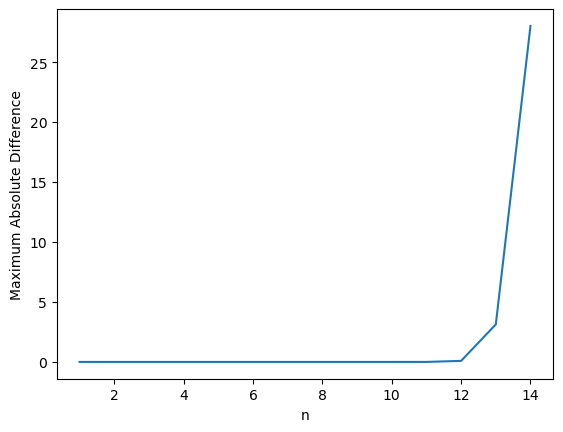

In [6]:
import matplotlib.pyplot as plt

n_values = np.arange(1, 15) # διαστάσεις 1..14
#print(n_values)
differences = []

for n in n_values:
    H = hilbert(n)
    b = np.ones((n, 1))

    # Αρχική λύση συστήματος
    L, U = LUmine(H)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)

    # Αλλαγή πίνακα σταθερών τιμών 
    bnew = b.copy()
    bnew[0] += 1e-15

    # Λύση νέου συστήματος
    ynew = np.linalg.solve(L, bnew)
    xnew = np.linalg.solve(U, ynew)

    max_diff = np.max(np.abs(x - xnew))
    differences.append(max_diff)

plt.plot(n_values, differences)
plt.xlabel('n')
plt.ylabel('Maximum Absolute Difference')
plt.show()


Παρατηρούμε πως με την αύξηση του n, μια απειροελάχιστη μεταβολή στο σύστημα προκαλεί μεγάλες μεταβολές στην λύση του. Έτσι, συμπεραίνουμε πως το σύστημα `Hx = b` είναι αριθμητικά ασταθές για μεγάλα n και ότι η ακρίβεια της λύσης μειώνεται.

**(ε):** Υπολογίζουμε το `HH^(-1)` και σχεδιάζουμε την απόλυτη διαφορά της νόρμας του με μοναδιαίο πίνακα διαφόρων διαστάσεων

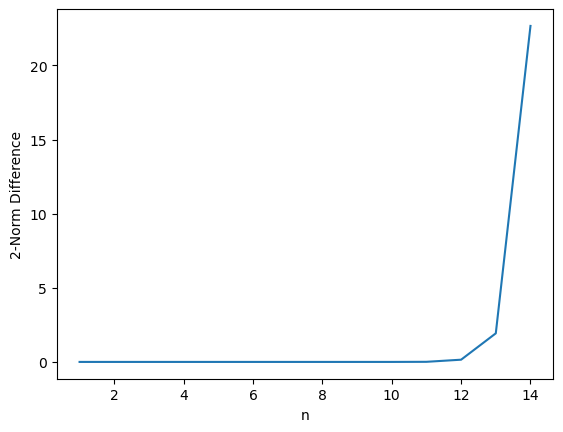

In [7]:
diffs = []

for n in n_values:
    H = hilbert(n)
    H_inv = np.matrix(np.linalg.inv(H))

    identity = np.matrix(np.identity(n)) # μοναδιαίος πίνακας διάστασης n
    norm_diff = np.linalg.norm(identity - H * H_inv)
    diffs.append(norm_diff)

plt.plot(n_values, diffs)
plt.xlabel('n')
plt.ylabel('2-Norm Difference')
plt.show()


Από την γραφική παράσταση παρατηρούμε όσο αυξάνεται η διάσταση `n` του πίνακα Η, αυξάνεται και η διαφορά της νόρμας του `HH^(-1)` με τον μοναδιαίο πίνακα. Άρα, συμπεραίνουμε ότι η διαδικασία αντιστροφής πινάκων Hilbert γίνεται ολοένα και λιγότερο ακριβής με την αύξηση του `n`.

## Πρόβλημα προσέγγισης

Ζητείται να βρούμε το πολυώνυμο 4ου βαθμού που προσεγγίζει βέλτιστα την συνάρτηση `y = cos(4t) + 0, 1ε(t)` σε 50 ισαπέχοντα σημεία με t μεταξύ 0 και 1. Τα διανύσματα `t` και `y` θα είναι τα εξής:

In [8]:
# 50 ισαπέχοντα σημεία με t μεταξύ 0 και 1
t = np.linspace(0, 1, 50)

# Σημεία συνάρτησης με θόρυβο
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])


Πρέπει να κατασκευάσουμε έναν πίνακα `A` με τις δυνάμεις του `t` ως στήλες και να λύσουμε το σύστημα `Ax = y`,όπου το `x` είναι το διάνυσμα των συντελεστών του πολυωνύμου, και το `y` είναι το διάνυσμα των παρατηρήσεων. Από την μέθοδο ελάχιστων τετραγώνων γνωρίζω πως πρέπει να λύσω το σύστημα `A.T*A*x = A.T*y`. Για την επίλυση χρησιμοποιούμε 2 τρόπους: παραγοντοποίηση LU και παραγοντοποίηση QR.

In [9]:
deg = 5 # βαθμός πολυωνύμου
y_matrix = np.matrix(y).T

A = np.matrix(np.ones((50,deg)))
for i in range(50):
    for j in range(1,deg):
        A[i,j] = t[i] ** j

ATA = A.T * A
ATy = A.T * y_matrix

# Λύση με παραγοντοποίηση LU
L, U = LUmine(ATA)
c = np.linalg.solve(L, ATy)
x_lu = np.linalg.solve(U, c) # διάνυσμα συντελεστών lu
    
# Λύση με παραγοντοποίηση QR
Q, R = QRmine(A.T * A)
x_qr = np.linalg.solve(R, Q.T * ATy) # διάνυσμα συντελεστών qr

#print("x_lu = \n",x_lu)
#print("x_qr = \n",x_qr)

Υπολογίζουμε τις τιμές των πολυωνύμων για τα σημεία `t` και το άθροισμα των τετραγωνικών σφαλμάτων που προκύπτουν από την παραπάνω προσέγγιση για κάθε τρόπο.

In [10]:
import numpy.polynomial.polynomial as poly

# Τιμές πολυωνύμων
y_lu_pol = poly.polyval(t, x_lu)
y_qr_pol = poly.polyval(t, x_qr)


# Άθροισμα των τετραγωνικών σφαλμάτων 
err_lu = np.sum((y - y_lu_pol) ** 2)
err_qr = np.sum((y - y_qr_pol) ** 2)
print("LU method: ", err_lu)
print("QR method: ", err_qr)

LU method:  0.31945876417894725
QR method:  0.31945876418037644


Τέλος, σχεδιάζουμε ένα διάγραμμα που περιέχει τα δεδομένα και την καμπύλη βέλτιστης προσέγγισης.

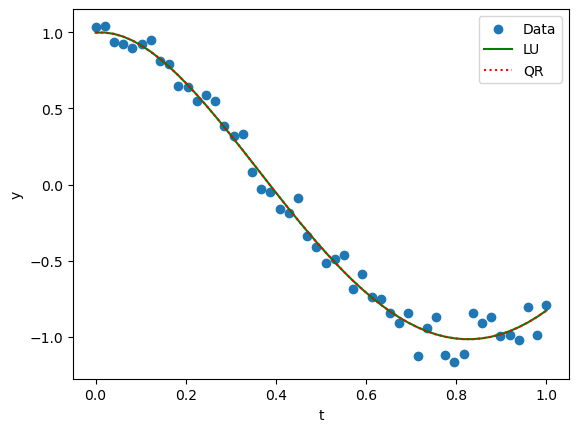

In [11]:
plt.scatter(t, y, label='Data')

plt.plot(t, y_lu_pol.T,'g', label='LU')
plt.plot(t, y_qr_pol.T,'r', label='QR', linestyle=":")

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## Πηγές
* Algorithms for the QR-Decomposition-WALTER GANDER
* https://python.quantecon.org/qr_decomp.html
* https://www.geeksforgeeks.org/numpy-matrix-python
* https://www.geeksforgeeks.org/graph-plotting-in-python-set-1